In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [3]:
data_paths = {
    "glioma": "/workspaces/Summative-assignment---MLOP/data/brain_tumor/glioma",
    "healthy": "/workspaces/Summative-assignment---MLOP/data/brain_tumor/healthy",
    "meningioma": "/workspaces/Summative-assignment---MLOP/data/brain_tumor/meningioma",
    "pituitary": "/workspaces/Summative-assignment---MLOP/data/brain_tumor/pituitary"
}


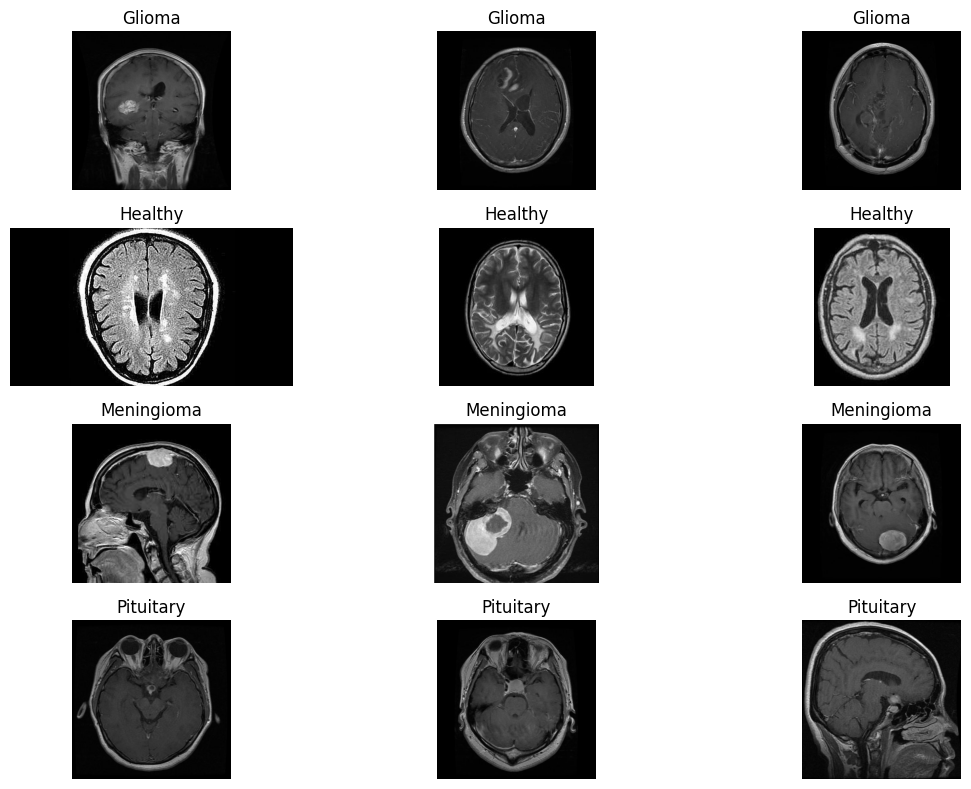

In [5]:
# Viewing Some Images


# Number of images to display per class
num_images_per_class = 3

# Plotting images
plt.figure(figsize=(12, 8))
for idx, (label, path) in enumerate(data_paths.items()):
    # Get a list of image files in the folder
    images = os.listdir(path)
    # Randomly select a few images from each class
    selected_images = random.sample(images, num_images_per_class)
    
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(path, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(len(data_paths), num_images_per_class, idx * num_images_per_class + i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label.capitalize())
        plt.axis('off')

plt.tight_layout()
plt.show()

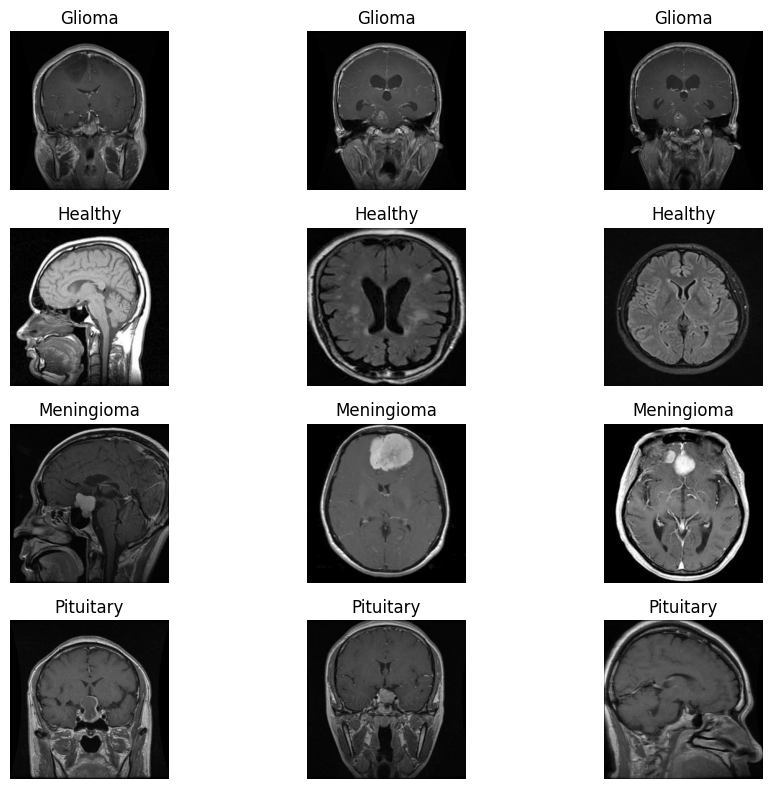

In [6]:
# Cropping and Resizing

# Define target sizes
crop_size = 512
target_size = 256  # Adjust this to 128 or 256 as per experimentation

# Preprocessing function
def preprocess_image(img_path):
    img = Image.open(img_path)
    width, height = img.size
    
    # Center crop if the image is larger than the target crop size
    if width > crop_size or height > crop_size:
        left = (width - crop_size) / 2
        top = (height - crop_size) / 2
        right = (width + crop_size) / 2
        bottom = (height + crop_size) / 2
        img = img.crop((left, top, right, bottom))

      # Resize to target size
    img = img.resize((target_size, target_size))
    return img

# Display preprocessed images
num_images_per_class = 3
plt.figure(figsize=(10, 8))

for idx, (label, path) in enumerate(data_paths.items()):
    images = os.listdir(path)
    selected_images = images[:num_images_per_class]  # First few images from each class
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(path, img_name)
        processed_img = preprocess_image(img_path)

        # Plot the image
        plt.subplot(len(data_paths), num_images_per_class, idx * num_images_per_class + i + 1)
        plt.imshow(processed_img, cmap='gray')
        plt.title(label.capitalize())
        plt.axis('off')

plt.tight_layout()
plt.show()